# Data preprocessing

In [1]:
import pandas as pd
from prophet.diagnostics import cross_validation, performance_metrics
df_main  =pd.read_csv('/home/emilien/code/EmilienStoret/favorita/Data/df_main_V4.csv')

/home/emilien/.pyenv/versions/favorita/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_main.head()

,id,date,store_nbr,family,sales,onpromotion,city,holidays,holidays_nat,is_holiday,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,0,1,1,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,0,1,1,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,0,1,1,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,0,1,1,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,0,1,1,93.14


In [3]:
df_main_store = df_main.groupby(['date','store_nbr']).agg({'sales':'sum', 'onpromotion':'sum', 'is_holiday':'mean', 'dcoilwtico':'mean'}) 

In [4]:
df_main_store.reset_index(inplace=True)

In [5]:
df_main_store_1=df_main_store[df_main_store['store_nbr']==1]
df_main_store_1

,date,store_nbr,sales,onpromotion,is_holiday,dcoilwtico
0,2013-01-01,1,0.000000,0,1.0,93.14
54,2013-01-02,1,7417.148000,0,0.0,93.14
108,2013-01-03,1,5873.244001,0,0.0,92.97
162,2013-01-04,1,5919.879001,0,0.0,93.12
216,2013-01-05,1,6318.785010,0,1.0,93.12
...,...,...,...,...,...,...
90666,2017-08-11,1,5403.742021,216,1.0,48.81
90720,2017-08-12,1,7543.623000,103,0.0,48.81
90774,2017-08-13,1,3902.782000,73,0.0,48.81
90828,2017-08-14,1,10433.314000,120,0.0,47.59


# Baseline computation

In [6]:
from prophet import Prophet
from favorita import functions

In [7]:
functions.get_baseline_score(df_main_store_1)

/home/emilien/code/EmilienStoret/favorita/favorita/functions.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'date': 'ds', 'sales':'y'}, inplace=True)
09:11:13 - cmdstanpy - INFO - Chain [1] start processing
09:11:14 - cmdstanpy - INFO - Chain [1] done processing


0.15375803081639253

# Prophet model

In [8]:
df_main_store_1.reset_index(inplace=True)
df_main_store_1.head()

,index,date,store_nbr,sales,onpromotion,is_holiday,dcoilwtico
0,0,2013-01-01,1,0.000000,0,1.0,93.14
1,54,2013-01-02,1,7417.148000,0,0.0,93.14
2,108,2013-01-03,1,5873.244001,0,0.0,92.97
3,162,2013-01-04,1,5919.879001,0,0.0,93.12
4,216,2013-01-05,1,6318.785010,0,1.0,93.12


In [9]:
df_train = df_main_store_1[df_main_store_1['date']<'2017-04-01']
df_train.rename(columns = {'date':'ds', 'sales':'y'}, inplace=True)
df_train.drop(columns = ['store_nbr'], inplace=True)
df_train

/tmp/ipykernel_814/4249790722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns = {'date':'ds', 'sales':'y'}, inplace=True)
/tmp/ipykernel_814/4249790722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns = ['store_nbr'], inplace=True)


,index,ds,y,onpromotion,is_holiday,dcoilwtico
0,0,2013-01-01,0.000000,0,1.0,93.14
1,54,2013-01-02,7417.148000,0,0.0,93.14
2,108,2013-01-03,5873.244001,0,0.0,92.97
3,162,2013-01-04,5919.879001,0,0.0,93.12
4,216,2013-01-05,6318.785010,0,1.0,93.12
...,...,...,...,...,...,...
1542,83268,2017-03-27,11811.434000,113,0.0,47.02
1543,83322,2017-03-28,10759.355980,107,0.0,48.36
1544,83376,2017-03-29,14369.385000,342,0.0,49.47
1545,83430,2017-03-30,10265.408000,90,0.0,50.30


In [10]:
df_test = df_main_store_1[(df_main_store_1['date']>='2017-04-01') & (df_main_store_1['date']<'2017-07-01')]
df_test.rename(columns = {'date':'ds', 'sales':'y'}, inplace=True)
df_test.drop(columns = ['store_nbr'], inplace=True)
df_test.shape

/tmp/ipykernel_814/3260819884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.rename(columns = {'date':'ds', 'sales':'y'}, inplace=True)
/tmp/ipykernel_814/3260819884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns = ['store_nbr'], inplace=True)


(91, 6)

In [11]:
df_main_store_1['is_holiday'].isna().sum()

0

09:11:15 - cmdstanpy - INFO - Chain [1] start processing
09:11:15 - cmdstanpy - INFO - Chain [1] done processing


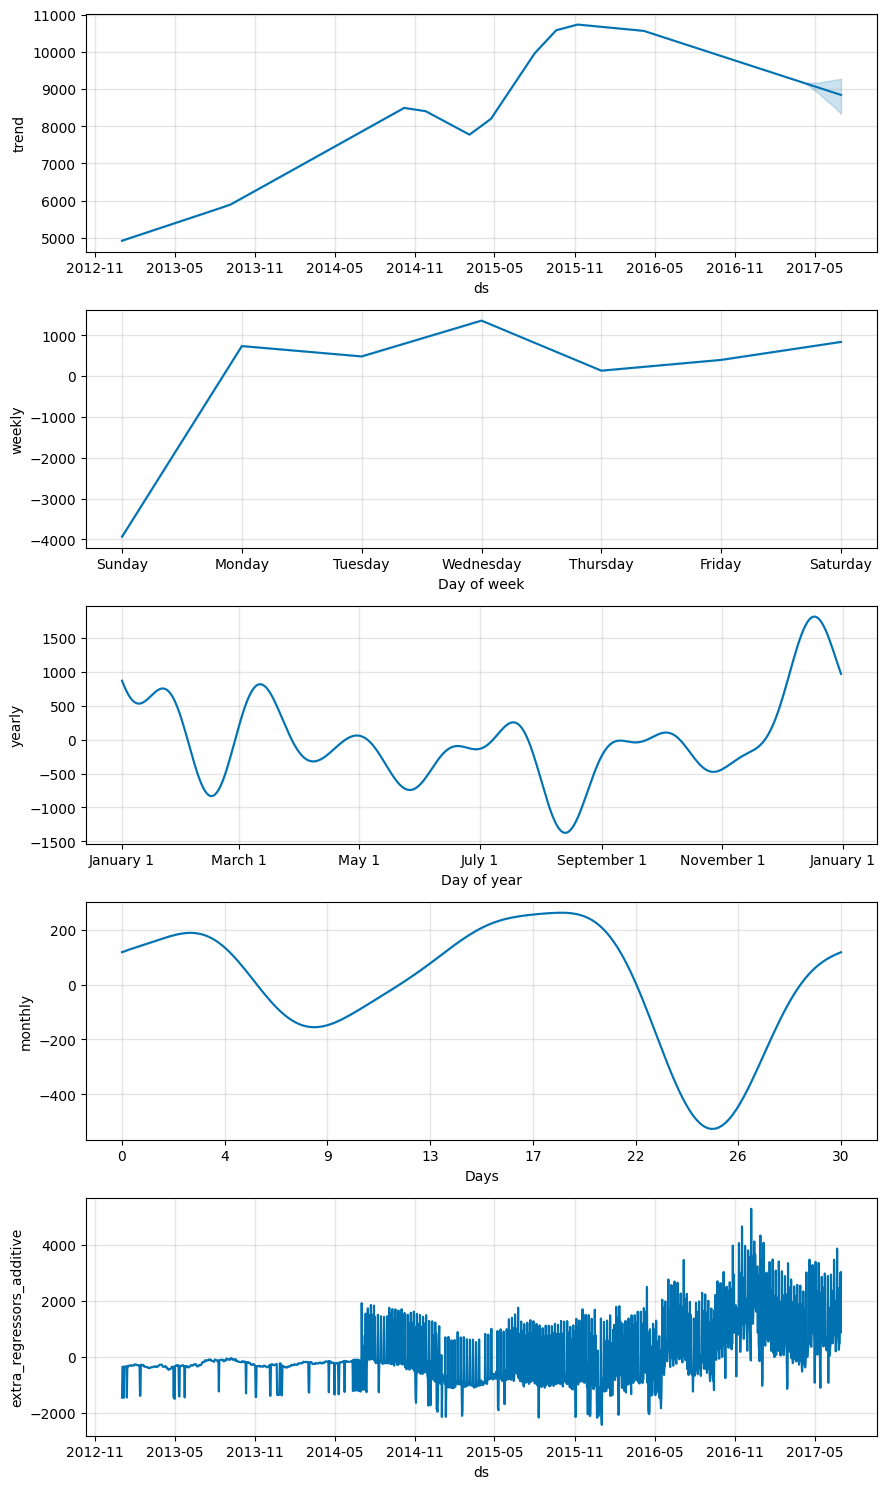

In [12]:
#train prophet
m = Prophet(interval_width=0.95, daily_seasonality=False, changepoint_prior_scale=0.08)
m.add_regressor('is_holiday')
m.add_regressor('onpromotion')
m.add_regressor('dcoilwtico')
m.add_seasonality(name='monthly', period=30.417, fourier_order=5)
model=m.fit(df_train[['ds', 'y', 'is_holiday', 'onpromotion', 'dcoilwtico']])

#forecast from prophet
future=m.make_future_dataframe(periods=91, freq= 'D')
future.insert(1, 'is_holiday', df_main_store_1['is_holiday'])
future.insert(1, 'onpromotion', df_main_store_1['onpromotion'])
future.insert(1, 'dcoilwtico', df_main_store_1['dcoilwtico'])
df_predict = m.predict(future)

fig = m.plot_components(df_predict)

In [13]:
functions.MAPE_of_forecast(df_predict, df_test)

0.14677597322494781

# Grid Search

In [14]:
#Select Hyperparam

from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':(['multiplicative']),
               'changepoint_prior_scale':[0.05, 0.08, 0.11],
               'seasonality_prior_scale':[0.05, 0.08, 0.11],
               'prior_scale_is_holiday':[0.01, 0.5, 0.1],
               'prior_scale_onpromotion':[0.01, 0.5, 0.1],
               'prior_scale_dcoilwtico':[0.01, 0.5, 0.1],
               'fourier_order':[2, 7]
              }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 486


In [15]:
import itertools

# Create parameter grid
params_grid = {'seasonality_mode':(['multiplicative']),
               'changepoint_prior_scale':[0.05, 0.08, 0.11],
               'seasonality_prior_scale':[0.05, 0.08, 0.11],
               'prior_scale_is_holiday':[0.01, 0.5, 0.1],
               'prior_scale_onpromotion':[0.01, 0.5, 0.1],
               'prior_scale_dcoilwtico':[0.01, 0.5, 0.1],
               'fourier_order':[2, 7]
              }

# Get all the model parameters in a list of dictionary
grid = ParameterGrid(params_grid)

mdape = []  # Store the RMSEs for each params here

for p in grid:
    m = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                         seasonality_prior_scale = p['seasonality_prior_scale'],
                         seasonality_mode = p['seasonality_mode'],
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         interval_width=0.95)
    m.add_regressor('is_holiday', prior_scale = p['prior_scale_is_holiday'])
    m.add_regressor('onpromotion', prior_scale = p['prior_scale_onpromotion'])
    m.add_regressor('dcoilwtico', prior_scale = p['prior_scale_dcoilwtico'])
    m.add_seasonality(name='monthly', period=30.417, fourier_order=p['fourier_order'])
    model=m.fit(df_train[['ds', 'y', 'is_holiday', 'onpromotion', 'dcoilwtico']])
    
    df_cv = cross_validation(m, horizon='91 days',initial = '1095 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mdape.append(df_p['mdape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(grid)
tuning_results['mdape'] = mdape
print(tuning_results)

09:11:18 - cmdstanpy - INFO - Chain [1] start processing
09:11:18 - cmdstanpy - INFO - Chain [1] done processing
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] start processing
09:11:19 - cmdstanpy - INFO - Chain [1] done processing
09:11:19 - cmdstanpy - INFO - Chain [1] done processing
09:11:19 - cmdstanpy - INFO - Chain [1] done processing
09:11:19 - cmdstanpy - INFO - Chain [1] done processing
09:11:19 - cmdstanpy - INFO - Chain [1] done processing
09:11:19 - cmdstanpy - INFO - Chain [1] done processing
09:11:19 - cmdstanpy - INFO - Chain [1] done processing
09:11:20 - cmdstanpy - INFO - Chain [1]

09:11:39 - cmdstanpy - INFO - Chain [1] start processing
09:11:39 - cmdstanpy - INFO - Chain [1] start processing
09:11:39 - cmdstanpy - INFO - Chain [1] start processing
09:11:39 - cmdstanpy - INFO - Chain [1] start processing
09:11:39 - cmdstanpy - INFO - Chain [1] start processing
09:11:40 - cmdstanpy - INFO - Chain [1] done processing
09:11:40 - cmdstanpy - INFO - Chain [1] done processing
09:11:40 - cmdstanpy - INFO - Chain [1] done processing
09:11:40 - cmdstanpy - INFO - Chain [1] done processing
09:11:40 - cmdstanpy - INFO - Chain [1] done processing
09:11:40 - cmdstanpy - INFO - Chain [1] done processing
09:11:40 - cmdstanpy - INFO - Chain [1] done processing
09:11:40 - cmdstanpy - INFO - Chain [1] done processing
09:11:41 - cmdstanpy - INFO - Chain [1] start processing
09:11:41 - cmdstanpy - INFO - Chain [1] done processing
09:11:42 - cmdstanpy - INFO - Chain [1] start processing
09:11:42 - cmdstanpy - INFO - Chain [1] done processing
09:11:43 - cmdstanpy - INFO - Chain [1] s

09:12:02 - cmdstanpy - INFO - Chain [1] done processing
09:12:02 - cmdstanpy - INFO - Chain [1] done processing
09:12:02 - cmdstanpy - INFO - Chain [1] done processing
09:12:02 - cmdstanpy - INFO - Chain [1] done processing
09:12:02 - cmdstanpy - INFO - Chain [1] done processing
09:12:02 - cmdstanpy - INFO - Chain [1] done processing
09:12:02 - cmdstanpy - INFO - Chain [1] done processing
09:12:02 - cmdstanpy - INFO - Chain [1] done processing
09:12:03 - cmdstanpy - INFO - Chain [1] start processing
09:12:03 - cmdstanpy - INFO - Chain [1] done processing
09:12:04 - cmdstanpy - INFO - Chain [1] start processing
09:12:04 - cmdstanpy - INFO - Chain [1] done processing
09:12:05 - cmdstanpy - INFO - Chain [1] start processing
09:12:05 - cmdstanpy - INFO - Chain [1] start processing
09:12:05 - cmdstanpy - INFO - Chain [1] start processing
09:12:05 - cmdstanpy - INFO - Chain [1] start processing
09:12:05 - cmdstanpy - INFO - Chain [1] start processing
09:12:05 - cmdstanpy - INFO - Chain [1] s

09:12:29 - cmdstanpy - INFO - Chain [1] done processing
09:12:29 - cmdstanpy - INFO - Chain [1] done processing
09:12:30 - cmdstanpy - INFO - Chain [1] start processing
09:12:30 - cmdstanpy - INFO - Chain [1] done processing
09:12:30 - cmdstanpy - INFO - Chain [1] start processing
09:12:31 - cmdstanpy - INFO - Chain [1] done processing
09:12:31 - cmdstanpy - INFO - Chain [1] start processing
09:12:31 - cmdstanpy - INFO - Chain [1] start processing
09:12:31 - cmdstanpy - INFO - Chain [1] start processing
09:12:31 - cmdstanpy - INFO - Chain [1] start processing
09:12:31 - cmdstanpy - INFO - Chain [1] start processing
09:12:31 - cmdstanpy - INFO - Chain [1] start processing
09:12:31 - cmdstanpy - INFO - Chain [1] start processing
09:12:31 - cmdstanpy - INFO - Chain [1] start processing
09:12:32 - cmdstanpy - INFO - Chain [1] done processing
09:12:32 - cmdstanpy - INFO - Chain [1] done processing
09:12:32 - cmdstanpy - INFO - Chain [1] done processing
09:12:32 - cmdstanpy - INFO - Chain [1

09:12:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:52 - cmdstanpy - INFO - Chain [1] done processing
09:12:52 - cmdstanpy - INFO - Chain [1] done processing
09:12:53 - cmdstanpy - INFO - Chain [1] done processing
09:12:53 - cmdstanpy - INFO - Chain [1] done processing
09:12:53 - cmdstanpy - INFO - Chain [1] done processing
09:12:53 - cmdstanpy - INFO - Chain [1] done processing
09:12:53 - cmdstanpy - INFO - Chain [1] done processing
09:12:53 - cmdstanpy - INFO - Chain [1] done processing
09:12:53 - cmdstanpy - INFO - Chain [1] start processing
09:12:54 - cmdstanpy - INFO - Chain [1]

09:13:13 - cmdstanpy - INFO - Chain [1] start processing
09:13:13 - cmdstanpy - INFO - Chain [1] start processing
09:13:13 - cmdstanpy - INFO - Chain [1] start processing
09:13:13 - cmdstanpy - INFO - Chain [1] done processing
09:13:13 - cmdstanpy - INFO - Chain [1] done processing
09:13:13 - cmdstanpy - INFO - Chain [1] done processing
09:13:13 - cmdstanpy - INFO - Chain [1] done processing
09:13:13 - cmdstanpy - INFO - Chain [1] done processing
09:13:13 - cmdstanpy - INFO - Chain [1] done processing
09:13:13 - cmdstanpy - INFO - Chain [1] done processing
09:13:14 - cmdstanpy - INFO - Chain [1] done processing
09:13:14 - cmdstanpy - INFO - Chain [1] start processing
09:13:14 - cmdstanpy - INFO - Chain [1] done processing
09:13:15 - cmdstanpy - INFO - Chain [1] start processing
09:13:15 - cmdstanpy - INFO - Chain [1] done processing
09:13:15 - cmdstanpy - INFO - Chain [1] start processing
09:13:15 - cmdstanpy - INFO - Chain [1] start processing
09:13:15 - cmdstanpy - INFO - Chain [1] s

09:13:34 - cmdstanpy - INFO - Chain [1] done processing
09:13:34 - cmdstanpy - INFO - Chain [1] done processing
09:13:34 - cmdstanpy - INFO - Chain [1] done processing
09:13:34 - cmdstanpy - INFO - Chain [1] done processing
09:13:34 - cmdstanpy - INFO - Chain [1] done processing
09:13:34 - cmdstanpy - INFO - Chain [1] done processing
09:13:34 - cmdstanpy - INFO - Chain [1] start processing
09:13:35 - cmdstanpy - INFO - Chain [1] done processing
09:13:35 - cmdstanpy - INFO - Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1] done processing
09:13:36 - cmdstanpy - INFO - Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1] start processing
09:13:36 - cmdstanpy - INFO - Chain [1]

09:13:55 - cmdstanpy - INFO - Chain [1] start processing
09:13:55 - cmdstanpy - INFO - Chain [1] done processing
09:13:56 - cmdstanpy - INFO - Chain [1] start processing
09:13:56 - cmdstanpy - INFO - Chain [1] done processing
09:13:57 - cmdstanpy - INFO - Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] start processing
09:13:57 - cmdstanpy - INFO - Chain [1] done processing
09:13:57 - cmdstanpy - INFO - Chain [1] done processing
09:13:57 - cmdstanpy - INFO - Chain [1] done processing
09:13:57 - cmdstanpy - INFO - Chain [1] done processing
09:13:57 - cmdstanpy - INFO - Chain [1] done processing
09:13:57 - cmdstanpy - INFO - Chain [1

09:14:21 - cmdstanpy - INFO - Chain [1] start processing
09:14:21 - cmdstanpy - INFO - Chain [1] start processing
09:14:21 - cmdstanpy - INFO - Chain [1] start processing
09:14:21 - cmdstanpy - INFO - Chain [1] start processing
09:14:21 - cmdstanpy - INFO - Chain [1] start processing
09:14:21 - cmdstanpy - INFO - Chain [1] start processing
09:14:21 - cmdstanpy - INFO - Chain [1] start processing
09:14:21 - cmdstanpy - INFO - Chain [1] done processing
09:14:22 - cmdstanpy - INFO - Chain [1] done processing
09:14:22 - cmdstanpy - INFO - Chain [1] done processing
09:14:22 - cmdstanpy - INFO - Chain [1] done processing
09:14:22 - cmdstanpy - INFO - Chain [1] done processing
09:14:22 - cmdstanpy - INFO - Chain [1] done processing
09:14:22 - cmdstanpy - INFO - Chain [1] done processing
09:14:22 - cmdstanpy - INFO - Chain [1] done processing
09:14:23 - cmdstanpy - INFO - Chain [1] start processing
09:14:23 - cmdstanpy - INFO - Chain [1] done processing
09:14:24 - cmdstanpy - INFO - Chain [1] 

09:14:42 - cmdstanpy - INFO - Chain [1] start processing
09:14:42 - cmdstanpy - INFO - Chain [1] start processing
09:14:42 - cmdstanpy - INFO - Chain [1] done processing
09:14:42 - cmdstanpy - INFO - Chain [1] done processing
09:14:42 - cmdstanpy - INFO - Chain [1] done processing
09:14:42 - cmdstanpy - INFO - Chain [1] done processing
09:14:42 - cmdstanpy - INFO - Chain [1] done processing
09:14:42 - cmdstanpy - INFO - Chain [1] done processing
09:14:42 - cmdstanpy - INFO - Chain [1] done processing
09:14:42 - cmdstanpy - INFO - Chain [1] done processing
09:14:43 - cmdstanpy - INFO - Chain [1] start processing
09:14:43 - cmdstanpy - INFO - Chain [1] done processing
09:14:44 - cmdstanpy - INFO - Chain [1] start processing
09:14:44 - cmdstanpy - INFO - Chain [1] done processing
09:14:44 - cmdstanpy - INFO - Chain [1] start processing
09:14:44 - cmdstanpy - INFO - Chain [1] start processing
09:14:44 - cmdstanpy - INFO - Chain [1] start processing
09:14:44 - cmdstanpy - INFO - Chain [1] s

09:15:04 - cmdstanpy - INFO - Chain [1] done processing
09:15:04 - cmdstanpy - INFO - Chain [1] done processing
09:15:04 - cmdstanpy - INFO - Chain [1] done processing
09:15:04 - cmdstanpy - INFO - Chain [1] done processing
09:15:04 - cmdstanpy - INFO - Chain [1] start processing
09:15:05 - cmdstanpy - INFO - Chain [1] done processing
09:15:05 - cmdstanpy - INFO - Chain [1] start processing
09:15:05 - cmdstanpy - INFO - Chain [1] done processing
09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:06 - cmdstanpy - INFO - Chain [1] done processing
09:15:06 - cmdstanpy - INFO - Chain [1

09:15:28 - cmdstanpy - INFO - Chain [1] start processing
09:15:29 - cmdstanpy - INFO - Chain [1] done processing
09:15:29 - cmdstanpy - INFO - Chain [1] start processing
09:15:29 - cmdstanpy - INFO - Chain [1] start processing
09:15:29 - cmdstanpy - INFO - Chain [1] start processing
09:15:29 - cmdstanpy - INFO - Chain [1] start processing
09:15:29 - cmdstanpy - INFO - Chain [1] start processing
09:15:29 - cmdstanpy - INFO - Chain [1] start processing
09:15:29 - cmdstanpy - INFO - Chain [1] start processing
09:15:29 - cmdstanpy - INFO - Chain [1] start processing
09:15:30 - cmdstanpy - INFO - Chain [1] done processing
09:15:30 - cmdstanpy - INFO - Chain [1] done processing
09:15:30 - cmdstanpy - INFO - Chain [1] done processing
09:15:30 - cmdstanpy - INFO - Chain [1] done processing
09:15:30 - cmdstanpy - INFO - Chain [1] done processing
09:15:30 - cmdstanpy - INFO - Chain [1] done processing
09:15:30 - cmdstanpy - INFO - Chain [1] done processing
09:15:30 - cmdstanpy - INFO - Chain [1]

09:15:51 - cmdstanpy - INFO - Chain [1] start processing
09:15:51 - cmdstanpy - INFO - Chain [1] start processing
09:15:51 - cmdstanpy - INFO - Chain [1] start processing
09:15:51 - cmdstanpy - INFO - Chain [1] start processing
09:15:51 - cmdstanpy - INFO - Chain [1] start processing
09:15:51 - cmdstanpy - INFO - Chain [1] done processing
09:15:51 - cmdstanpy - INFO - Chain [1] done processing
09:15:51 - cmdstanpy - INFO - Chain [1] done processing
09:15:51 - cmdstanpy - INFO - Chain [1] done processing
09:15:51 - cmdstanpy - INFO - Chain [1] done processing
09:15:52 - cmdstanpy - INFO - Chain [1] done processing
09:15:52 - cmdstanpy - INFO - Chain [1] done processing
09:15:52 - cmdstanpy - INFO - Chain [1] done processing
09:15:52 - cmdstanpy - INFO - Chain [1] start processing
09:15:53 - cmdstanpy - INFO - Chain [1] done processing
09:15:53 - cmdstanpy - INFO - Chain [1] start processing
09:15:54 - cmdstanpy - INFO - Chain [1] done processing
09:15:54 - cmdstanpy - INFO - Chain [1] s

09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:14 - cmdstanpy - INFO - Chain [1] done processing
09:16:15 - cmdstanpy - INFO - Chain [1] done processing
09:16:15 - cmdstanpy - INFO - Chain [1] start processing
09:16:15 - cmdstanpy - INFO - Chain [1] done processing
09:16:16 - cmdstanpy - INFO - Chain [1] start processing
09:16:16 - cmdstanpy - INFO - Chain [1] done processing
09:16:17 - cmdstanpy - INFO - Chain [1] start processing
09:16:17 - cmdstanpy - INFO - Chain [1] start processing
09:16:17 - cmdstanpy - INFO - Chain [1] start processing
09:16:17 - cmdstanpy - INFO - Chain [1] start processing
09:16:17 - cmdstanpy - INFO - Chain [1] start processing
09:16:17 - cmdstanpy - INFO - Chain [1] s

09:16:36 - cmdstanpy - INFO - Chain [1] done processing
09:16:37 - cmdstanpy - INFO - Chain [1] done processing
09:16:37 - cmdstanpy - INFO - Chain [1] start processing
09:16:37 - cmdstanpy - INFO - Chain [1] done processing
09:16:38 - cmdstanpy - INFO - Chain [1] start processing
09:16:38 - cmdstanpy - INFO - Chain [1] done processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] start processing
09:16:39 - cmdstanpy - INFO - Chain [1] done processing
09:16:39 - cmdstanpy - INFO - Chain [1] done processing
09:16:39 - cmdstanpy - INFO - Chain [1] done processing
09:16:39 - cmdstanpy - INFO - Chain [1

09:17:07 - cmdstanpy - INFO - Chain [1] start processing
09:17:07 - cmdstanpy - INFO - Chain [1] start processing
09:17:07 - cmdstanpy - INFO - Chain [1] start processing
09:17:07 - cmdstanpy - INFO - Chain [1] start processing
09:17:07 - cmdstanpy - INFO - Chain [1] start processing
09:17:07 - cmdstanpy - INFO - Chain [1] start processing
09:17:07 - cmdstanpy - INFO - Chain [1] start processing
09:17:07 - cmdstanpy - INFO - Chain [1] start processing
09:17:07 - cmdstanpy - INFO - Chain [1] done processing
09:17:07 - cmdstanpy - INFO - Chain [1] done processing
09:17:07 - cmdstanpy - INFO - Chain [1] done processing
09:17:07 - cmdstanpy - INFO - Chain [1] done processing
09:17:07 - cmdstanpy - INFO - Chain [1] done processing
09:17:07 - cmdstanpy - INFO - Chain [1] done processing
09:17:08 - cmdstanpy - INFO - Chain [1] done processing
09:17:08 - cmdstanpy - INFO - Chain [1] done processing
09:17:08 - cmdstanpy - INFO - Chain [1] start processing
09:17:08 - cmdstanpy - INFO - Chain [1]

09:17:34 - cmdstanpy - INFO - Chain [1] start processing
09:17:34 - cmdstanpy - INFO - Chain [1] start processing
09:17:34 - cmdstanpy - INFO - Chain [1] start processing
09:17:34 - cmdstanpy - INFO - Chain [1] done processing
09:17:34 - cmdstanpy - INFO - Chain [1] done processing
09:17:34 - cmdstanpy - INFO - Chain [1] done processing
09:17:35 - cmdstanpy - INFO - Chain [1] done processing
09:17:35 - cmdstanpy - INFO - Chain [1] done processing
09:17:35 - cmdstanpy - INFO - Chain [1] done processing
09:17:35 - cmdstanpy - INFO - Chain [1] done processing
09:17:35 - cmdstanpy - INFO - Chain [1] done processing
09:17:35 - cmdstanpy - INFO - Chain [1] start processing
09:17:36 - cmdstanpy - INFO - Chain [1] done processing
09:17:37 - cmdstanpy - INFO - Chain [1] start processing
09:17:37 - cmdstanpy - INFO - Chain [1] done processing
09:17:37 - cmdstanpy - INFO - Chain [1] start processing
09:17:37 - cmdstanpy - INFO - Chain [1] start processing
09:17:37 - cmdstanpy - INFO - Chain [1] s

09:17:59 - cmdstanpy - INFO - Chain [1] done processing
09:17:59 - cmdstanpy - INFO - Chain [1] done processing
09:17:59 - cmdstanpy - INFO - Chain [1] done processing
09:17:59 - cmdstanpy - INFO - Chain [1] done processing
09:17:59 - cmdstanpy - INFO - Chain [1] done processing
09:18:00 - cmdstanpy - INFO - Chain [1] done processing
09:18:00 - cmdstanpy - INFO - Chain [1] start processing
09:18:01 - cmdstanpy - INFO - Chain [1] done processing
09:18:02 - cmdstanpy - INFO - Chain [1] start processing
09:18:02 - cmdstanpy - INFO - Chain [1] done processing
09:18:03 - cmdstanpy - INFO - Chain [1] start processing
09:18:03 - cmdstanpy - INFO - Chain [1] start processing
09:18:03 - cmdstanpy - INFO - Chain [1] start processing
09:18:03 - cmdstanpy - INFO - Chain [1] start processing
09:18:03 - cmdstanpy - INFO - Chain [1] start processing
09:18:03 - cmdstanpy - INFO - Chain [1] start processing
09:18:03 - cmdstanpy - INFO - Chain [1] start processing
09:18:03 - cmdstanpy - INFO - Chain [1]

09:18:29 - cmdstanpy - INFO - Chain [1] start processing
09:18:30 - cmdstanpy - INFO - Chain [1] done processing
09:18:30 - cmdstanpy - INFO - Chain [1] start processing
09:18:31 - cmdstanpy - INFO - Chain [1] done processing
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] start processing
09:18:32 - cmdstanpy - INFO - Chain [1] done processing
09:18:32 - cmdstanpy - INFO - Chain [1] done processing
09:18:32 - cmdstanpy - INFO - Chain [1] done processing
09:18:32 - cmdstanpy - INFO - Chain [1] done processing
09:18:33 - cmdstanpy - INFO - Chain [1] done processing
09:18:33 - cmdstanpy - INFO - Chain [1

09:18:59 - cmdstanpy - INFO - Chain [1] start processing
09:18:59 - cmdstanpy - INFO - Chain [1] start processing
09:18:59 - cmdstanpy - INFO - Chain [1] start processing
09:18:59 - cmdstanpy - INFO - Chain [1] start processing
09:18:59 - cmdstanpy - INFO - Chain [1] start processing
09:18:59 - cmdstanpy - INFO - Chain [1] start processing
09:18:59 - cmdstanpy - INFO - Chain [1] start processing
09:18:59 - cmdstanpy - INFO - Chain [1] done processing
09:18:59 - cmdstanpy - INFO - Chain [1] done processing
09:18:59 - cmdstanpy - INFO - Chain [1] done processing
09:18:59 - cmdstanpy - INFO - Chain [1] done processing
09:18:59 - cmdstanpy - INFO - Chain [1] done processing
09:18:59 - cmdstanpy - INFO - Chain [1] done processing
09:18:59 - cmdstanpy - INFO - Chain [1] done processing
09:19:00 - cmdstanpy - INFO - Chain [1] done processing
09:19:00 - cmdstanpy - INFO - Chain [1] start processing
09:19:00 - cmdstanpy - INFO - Chain [1] done processing
09:19:01 - cmdstanpy - INFO - Chain [1] 

09:19:22 - cmdstanpy - INFO - Chain [1] start processing
09:19:22 - cmdstanpy - INFO - Chain [1] start processing
09:19:22 - cmdstanpy - INFO - Chain [1] done processing
09:19:22 - cmdstanpy - INFO - Chain [1] done processing
09:19:22 - cmdstanpy - INFO - Chain [1] done processing
09:19:23 - cmdstanpy - INFO - Chain [1] done processing
09:19:23 - cmdstanpy - INFO - Chain [1] done processing
09:19:23 - cmdstanpy - INFO - Chain [1] done processing
09:19:23 - cmdstanpy - INFO - Chain [1] done processing
09:19:23 - cmdstanpy - INFO - Chain [1] done processing
09:19:23 - cmdstanpy - INFO - Chain [1] start processing
09:19:24 - cmdstanpy - INFO - Chain [1] done processing
09:19:24 - cmdstanpy - INFO - Chain [1] start processing
09:19:24 - cmdstanpy - INFO - Chain [1] done processing
09:19:25 - cmdstanpy - INFO - Chain [1] start processing
09:19:25 - cmdstanpy - INFO - Chain [1] start processing
09:19:25 - cmdstanpy - INFO - Chain [1] start processing
09:19:25 - cmdstanpy - INFO - Chain [1] s

09:19:46 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] done processing
09:19:47 - cmdstanpy - INFO - Chain [1] start processing
09:19:48 - cmdstanpy - INFO - Chain [1] done processing
09:19:48 - cmdstanpy - INFO - Chain [1] start processing
09:19:48 - cmdstanpy - INFO - Chain [1] done processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] start processing
09:19:49 - cmdstanpy - INFO - Chain [1] done processing
09:19:49 - cmdstanpy - INFO - Chain [1

09:20:12 - cmdstanpy - INFO - Chain [1] start processing
09:20:12 - cmdstanpy - INFO - Chain [1] done processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] start processing
09:20:13 - cmdstanpy - INFO - Chain [1] done processing
09:20:14 - cmdstanpy - INFO - Chain [1] done processing
09:20:14 - cmdstanpy - INFO - Chain [1] done processing
09:20:14 - cmdstanpy - INFO - Chain [1] done processing
09:20:14 - cmdstanpy - INFO - Chain [1] done processing
09:20:14 - cmdstanpy - INFO - Chain [1] done processing
09:20:15 - cmdstanpy - INFO - Chain [1] done processing
09:20:15 - cmdstanpy - INFO - Chain [1]

09:20:38 - cmdstanpy - INFO - Chain [1] start processing
09:20:38 - cmdstanpy - INFO - Chain [1] start processing
09:20:38 - cmdstanpy - INFO - Chain [1] start processing
09:20:38 - cmdstanpy - INFO - Chain [1] start processing
09:20:38 - cmdstanpy - INFO - Chain [1] start processing
09:20:38 - cmdstanpy - INFO - Chain [1] done processing
09:20:39 - cmdstanpy - INFO - Chain [1] done processing
09:20:39 - cmdstanpy - INFO - Chain [1] done processing
09:20:39 - cmdstanpy - INFO - Chain [1] done processing
09:20:39 - cmdstanpy - INFO - Chain [1] done processing
09:20:39 - cmdstanpy - INFO - Chain [1] done processing
09:20:39 - cmdstanpy - INFO - Chain [1] done processing
09:20:39 - cmdstanpy - INFO - Chain [1] done processing
09:20:40 - cmdstanpy - INFO - Chain [1] start processing
09:20:40 - cmdstanpy - INFO - Chain [1] done processing
09:20:41 - cmdstanpy - INFO - Chain [1] start processing
09:20:41 - cmdstanpy - INFO - Chain [1] done processing
09:20:41 - cmdstanpy - INFO - Chain [1] s

09:21:03 - cmdstanpy - INFO - Chain [1] done processing
09:21:04 - cmdstanpy - INFO - Chain [1] done processing
09:21:04 - cmdstanpy - INFO - Chain [1] done processing
09:21:04 - cmdstanpy - INFO - Chain [1] done processing
09:21:04 - cmdstanpy - INFO - Chain [1] done processing
09:21:04 - cmdstanpy - INFO - Chain [1] done processing
09:21:04 - cmdstanpy - INFO - Chain [1] done processing
09:21:05 - cmdstanpy - INFO - Chain [1] done processing
09:21:05 - cmdstanpy - INFO - Chain [1] start processing
09:21:05 - cmdstanpy - INFO - Chain [1] done processing
09:21:06 - cmdstanpy - INFO - Chain [1] start processing
09:21:06 - cmdstanpy - INFO - Chain [1] done processing
09:21:07 - cmdstanpy - INFO - Chain [1] start processing
09:21:07 - cmdstanpy - INFO - Chain [1] start processing
09:21:07 - cmdstanpy - INFO - Chain [1] start processing
09:21:07 - cmdstanpy - INFO - Chain [1] start processing
09:21:07 - cmdstanpy - INFO - Chain [1] start processing
09:21:07 - cmdstanpy - INFO - Chain [1] s

09:21:40 - cmdstanpy - INFO - Chain [1] done processing
09:21:40 - cmdstanpy - INFO - Chain [1] done processing
09:21:40 - cmdstanpy - INFO - Chain [1] start processing
09:21:40 - cmdstanpy - INFO - Chain [1] done processing
09:21:41 - cmdstanpy - INFO - Chain [1] start processing
09:21:42 - cmdstanpy - INFO - Chain [1] done processing
09:21:42 - cmdstanpy - INFO - Chain [1] start processing
09:21:42 - cmdstanpy - INFO - Chain [1] start processing
09:21:42 - cmdstanpy - INFO - Chain [1] start processing
09:21:42 - cmdstanpy - INFO - Chain [1] start processing
09:21:42 - cmdstanpy - INFO - Chain [1] start processing
09:21:42 - cmdstanpy - INFO - Chain [1] start processing
09:21:43 - cmdstanpy - INFO - Chain [1] start processing
09:21:43 - cmdstanpy - INFO - Chain [1] start processing
09:21:43 - cmdstanpy - INFO - Chain [1] done processing
09:21:43 - cmdstanpy - INFO - Chain [1] done processing
09:21:44 - cmdstanpy - INFO - Chain [1] done processing
09:21:44 - cmdstanpy - INFO - Chain [1

09:22:13 - cmdstanpy - INFO - Chain [1] start processing
09:22:13 - cmdstanpy - INFO - Chain [1] start processing
09:22:13 - cmdstanpy - INFO - Chain [1] start processing
09:22:13 - cmdstanpy - INFO - Chain [1] start processing
09:22:13 - cmdstanpy - INFO - Chain [1] start processing
09:22:13 - cmdstanpy - INFO - Chain [1] start processing
09:22:13 - cmdstanpy - INFO - Chain [1] start processing
09:22:13 - cmdstanpy - INFO - Chain [1] start processing
09:22:13 - cmdstanpy - INFO - Chain [1] done processing
09:22:13 - cmdstanpy - INFO - Chain [1] done processing
09:22:13 - cmdstanpy - INFO - Chain [1] done processing
09:22:14 - cmdstanpy - INFO - Chain [1] done processing
09:22:14 - cmdstanpy - INFO - Chain [1] done processing
09:22:14 - cmdstanpy - INFO - Chain [1] done processing
09:22:14 - cmdstanpy - INFO - Chain [1] done processing
09:22:14 - cmdstanpy - INFO - Chain [1] done processing
09:22:14 - cmdstanpy - INFO - Chain [1] start processing
09:22:15 - cmdstanpy - INFO - Chain [1]

09:22:43 - cmdstanpy - INFO - Chain [1] start processing
09:22:44 - cmdstanpy - INFO - Chain [1] start processing
09:22:44 - cmdstanpy - INFO - Chain [1] start processing
09:22:44 - cmdstanpy - INFO - Chain [1] done processing
09:22:44 - cmdstanpy - INFO - Chain [1] done processing
09:22:44 - cmdstanpy - INFO - Chain [1] done processing
09:22:44 - cmdstanpy - INFO - Chain [1] done processing
09:22:44 - cmdstanpy - INFO - Chain [1] done processing
09:22:44 - cmdstanpy - INFO - Chain [1] done processing
09:22:44 - cmdstanpy - INFO - Chain [1] done processing
09:22:45 - cmdstanpy - INFO - Chain [1] done processing
09:22:45 - cmdstanpy - INFO - Chain [1] start processing
09:22:46 - cmdstanpy - INFO - Chain [1] done processing
09:22:46 - cmdstanpy - INFO - Chain [1] start processing
09:22:47 - cmdstanpy - INFO - Chain [1] done processing
09:22:47 - cmdstanpy - INFO - Chain [1] start processing
09:22:47 - cmdstanpy - INFO - Chain [1] start processing
09:22:47 - cmdstanpy - INFO - Chain [1] s

09:23:11 - cmdstanpy - INFO - Chain [1] done processing
09:23:12 - cmdstanpy - INFO - Chain [1] done processing
09:23:12 - cmdstanpy - INFO - Chain [1] done processing
09:23:12 - cmdstanpy - INFO - Chain [1] done processing
09:23:12 - cmdstanpy - INFO - Chain [1] done processing
09:23:13 - cmdstanpy - INFO - Chain [1] start processing
09:23:13 - cmdstanpy - INFO - Chain [1] done processing
09:23:13 - cmdstanpy - INFO - Chain [1] done processing
09:23:14 - cmdstanpy - INFO - Chain [1] start processing
09:23:15 - cmdstanpy - INFO - Chain [1] done processing
09:23:16 - cmdstanpy - INFO - Chain [1] start processing
09:23:16 - cmdstanpy - INFO - Chain [1] start processing
09:23:16 - cmdstanpy - INFO - Chain [1] start processing
09:23:16 - cmdstanpy - INFO - Chain [1] start processing
09:23:16 - cmdstanpy - INFO - Chain [1] start processing
09:23:16 - cmdstanpy - INFO - Chain [1] start processing
09:23:16 - cmdstanpy - INFO - Chain [1] start processing
09:23:16 - cmdstanpy - INFO - Chain [1]

09:23:45 - cmdstanpy - INFO - Chain [1] done processing
09:23:46 - cmdstanpy - INFO - Chain [1] done processing
09:23:47 - cmdstanpy - INFO - Chain [1] start processing
09:23:48 - cmdstanpy - INFO - Chain [1] done processing
09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:23:49 - cmdstanpy - INFO - Chain [1] done processing
09:23:50 - cmdstanpy - INFO - Chain [1] done processing
09:23:50 - cmdstanpy - INFO - Chain [1] done processing
09:23:50 - cmdstanpy - INFO - Chain [1] done processing
09:23:50 - cmdstanpy - INFO - Chain [1] done processing
09:23:50 - cmdstanpy - INFO - Chain [1]

09:24:19 - cmdstanpy - INFO - Chain [1] start processing
09:24:19 - cmdstanpy - INFO - Chain [1] start processing
09:24:19 - cmdstanpy - INFO - Chain [1] start processing
09:24:19 - cmdstanpy - INFO - Chain [1] start processing
09:24:20 - cmdstanpy - INFO - Chain [1] start processing
09:24:20 - cmdstanpy - INFO - Chain [1] start processing
09:24:20 - cmdstanpy - INFO - Chain [1] done processing
09:24:20 - cmdstanpy - INFO - Chain [1] done processing
09:24:21 - cmdstanpy - INFO - Chain [1] done processing
09:24:21 - cmdstanpy - INFO - Chain [1] done processing
09:24:21 - cmdstanpy - INFO - Chain [1] done processing
09:24:21 - cmdstanpy - INFO - Chain [1] done processing
09:24:22 - cmdstanpy - INFO - Chain [1] done processing
09:24:22 - cmdstanpy - INFO - Chain [1] done processing
09:24:22 - cmdstanpy - INFO - Chain [1] start processing
09:24:23 - cmdstanpy - INFO - Chain [1] done processing
09:24:24 - cmdstanpy - INFO - Chain [1] start processing
09:24:24 - cmdstanpy - INFO - Chain [1] 

09:24:49 - cmdstanpy - INFO - Chain [1] start processing
09:24:50 - cmdstanpy - INFO - Chain [1] done processing
09:24:50 - cmdstanpy - INFO - Chain [1] done processing
09:24:50 - cmdstanpy - INFO - Chain [1] done processing
09:24:50 - cmdstanpy - INFO - Chain [1] done processing
09:24:50 - cmdstanpy - INFO - Chain [1] done processing
09:24:51 - cmdstanpy - INFO - Chain [1] done processing
09:24:51 - cmdstanpy - INFO - Chain [1] done processing
09:24:51 - cmdstanpy - INFO - Chain [1] done processing
09:24:51 - cmdstanpy - INFO - Chain [1] start processing
09:24:52 - cmdstanpy - INFO - Chain [1] done processing
09:24:53 - cmdstanpy - INFO - Chain [1] start processing
09:24:54 - cmdstanpy - INFO - Chain [1] done processing
09:24:54 - cmdstanpy - INFO - Chain [1] start processing
09:24:54 - cmdstanpy - INFO - Chain [1] start processing
09:24:54 - cmdstanpy - INFO - Chain [1] start processing
09:24:54 - cmdstanpy - INFO - Chain [1] start processing
09:24:54 - cmdstanpy - INFO - Chain [1] s

09:25:22 - cmdstanpy - INFO - Chain [1] done processing
09:25:22 - cmdstanpy - INFO - Chain [1] done processing
09:25:22 - cmdstanpy - INFO - Chain [1] done processing
09:25:22 - cmdstanpy - INFO - Chain [1] start processing
09:25:23 - cmdstanpy - INFO - Chain [1] done processing
09:25:23 - cmdstanpy - INFO - Chain [1] start processing
09:25:24 - cmdstanpy - INFO - Chain [1] done processing
09:25:24 - cmdstanpy - INFO - Chain [1] start processing
09:25:24 - cmdstanpy - INFO - Chain [1] start processing
09:25:24 - cmdstanpy - INFO - Chain [1] start processing
09:25:24 - cmdstanpy - INFO - Chain [1] start processing
09:25:24 - cmdstanpy - INFO - Chain [1] start processing
09:25:25 - cmdstanpy - INFO - Chain [1] start processing
09:25:25 - cmdstanpy - INFO - Chain [1] start processing
09:25:25 - cmdstanpy - INFO - Chain [1] start processing
09:25:25 - cmdstanpy - INFO - Chain [1] done processing
09:25:25 - cmdstanpy - INFO - Chain [1] done processing
09:25:25 - cmdstanpy - INFO - Chain [1

09:25:52 - cmdstanpy - INFO - Chain [1] done processing
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] start processing
09:25:53 - cmdstanpy - INFO - Chain [1] done processing
09:25:53 - cmdstanpy - INFO - Chain [1] done processing
09:25:54 - cmdstanpy - INFO - Chain [1] done processing
09:25:54 - cmdstanpy - INFO - Chain [1] done processing
09:25:54 - cmdstanpy - INFO - Chain [1] done processing
09:25:54 - cmdstanpy - INFO - Chain [1] done processing
09:25:55 - cmdstanpy - INFO - Chain [1] done processing
09:25:55 - cmdstanpy - INFO - Chain [1] done processing
09:25:55 - cmdstanpy - INFO - Chain [1] 

09:26:25 - cmdstanpy - INFO - Chain [1] start processing
09:26:25 - cmdstanpy - INFO - Chain [1] start processing
09:26:25 - cmdstanpy - INFO - Chain [1] start processing
09:26:25 - cmdstanpy - INFO - Chain [1] start processing
09:26:26 - cmdstanpy - INFO - Chain [1] done processing
09:26:26 - cmdstanpy - INFO - Chain [1] done processing
09:26:26 - cmdstanpy - INFO - Chain [1] done processing
09:26:27 - cmdstanpy - INFO - Chain [1] done processing
09:26:27 - cmdstanpy - INFO - Chain [1] done processing
09:26:27 - cmdstanpy - INFO - Chain [1] done processing
09:26:27 - cmdstanpy - INFO - Chain [1] done processing
09:26:27 - cmdstanpy - INFO - Chain [1] done processing
09:26:28 - cmdstanpy - INFO - Chain [1] start processing
09:26:28 - cmdstanpy - INFO - Chain [1] done processing
09:26:29 - cmdstanpy - INFO - Chain [1] start processing
09:26:30 - cmdstanpy - INFO - Chain [1] done processing
09:26:31 - cmdstanpy - INFO - Chain [1] start processing
09:26:31 - cmdstanpy - INFO - Chain [1] s

09:27:03 - cmdstanpy - INFO - Chain [1] done processing
09:27:04 - cmdstanpy - INFO - Chain [1] done processing
09:27:04 - cmdstanpy - INFO - Chain [1] done processing
09:27:05 - cmdstanpy - INFO - Chain [1] done processing
09:27:05 - cmdstanpy - INFO - Chain [1] done processing
09:27:05 - cmdstanpy - INFO - Chain [1] done processing
09:27:05 - cmdstanpy - INFO - Chain [1] done processing
09:27:06 - cmdstanpy - INFO - Chain [1] start processing
09:27:06 - cmdstanpy - INFO - Chain [1] done processing
09:27:07 - cmdstanpy - INFO - Chain [1] start processing
09:27:07 - cmdstanpy - INFO - Chain [1] done processing
09:27:08 - cmdstanpy - INFO - Chain [1] start processing
09:27:08 - cmdstanpy - INFO - Chain [1] start processing
09:27:08 - cmdstanpy - INFO - Chain [1] start processing
09:27:08 - cmdstanpy - INFO - Chain [1] start processing
09:27:08 - cmdstanpy - INFO - Chain [1] start processing
09:27:08 - cmdstanpy - INFO - Chain [1] start processing
09:27:08 - cmdstanpy - INFO - Chain [1] 

09:27:35 - cmdstanpy - INFO - Chain [1] done processing
09:27:35 - cmdstanpy - INFO - Chain [1] start processing
09:27:35 - cmdstanpy - INFO - Chain [1] done processing
09:27:36 - cmdstanpy - INFO - Chain [1] start processing
09:27:36 - cmdstanpy - INFO - Chain [1] done processing
09:27:37 - cmdstanpy - INFO - Chain [1] start processing
09:27:37 - cmdstanpy - INFO - Chain [1] start processing
09:27:37 - cmdstanpy - INFO - Chain [1] start processing
09:27:37 - cmdstanpy - INFO - Chain [1] start processing
09:27:37 - cmdstanpy - INFO - Chain [1] start processing
09:27:37 - cmdstanpy - INFO - Chain [1] start processing
09:27:37 - cmdstanpy - INFO - Chain [1] start processing
09:27:37 - cmdstanpy - INFO - Chain [1] start processing
09:27:37 - cmdstanpy - INFO - Chain [1] done processing
09:27:38 - cmdstanpy - INFO - Chain [1] done processing
09:27:38 - cmdstanpy - INFO - Chain [1] done processing
09:27:38 - cmdstanpy - INFO - Chain [1] done processing
09:27:38 - cmdstanpy - INFO - Chain [1

09:28:08 - cmdstanpy - INFO - Chain [1] start processing
09:28:08 - cmdstanpy - INFO - Chain [1] start processing
09:28:08 - cmdstanpy - INFO - Chain [1] start processing
09:28:08 - cmdstanpy - INFO - Chain [1] start processing
09:28:08 - cmdstanpy - INFO - Chain [1] start processing
09:28:08 - cmdstanpy - INFO - Chain [1] start processing
09:28:08 - cmdstanpy - INFO - Chain [1] start processing
09:28:09 - cmdstanpy - INFO - Chain [1] done processing
09:28:09 - cmdstanpy - INFO - Chain [1] done processing
09:28:09 - cmdstanpy - INFO - Chain [1] done processing
09:28:10 - cmdstanpy - INFO - Chain [1] done processing
09:28:10 - cmdstanpy - INFO - Chain [1] done processing
09:28:10 - cmdstanpy - INFO - Chain [1] done processing
09:28:10 - cmdstanpy - INFO - Chain [1] done processing
09:28:10 - cmdstanpy - INFO - Chain [1] done processing
09:28:11 - cmdstanpy - INFO - Chain [1] start processing
09:28:11 - cmdstanpy - INFO - Chain [1] done processing
09:28:12 - cmdstanpy - INFO - Chain [1] 

09:28:39 - cmdstanpy - INFO - Chain [1] start processing
09:28:39 - cmdstanpy - INFO - Chain [1] start processing
09:28:39 - cmdstanpy - INFO - Chain [1] done processing
09:28:39 - cmdstanpy - INFO - Chain [1] done processing
09:28:40 - cmdstanpy - INFO - Chain [1] done processing
09:28:40 - cmdstanpy - INFO - Chain [1] done processing
09:28:40 - cmdstanpy - INFO - Chain [1] done processing
09:28:40 - cmdstanpy - INFO - Chain [1] done processing
09:28:40 - cmdstanpy - INFO - Chain [1] done processing
09:28:40 - cmdstanpy - INFO - Chain [1] done processing
09:28:41 - cmdstanpy - INFO - Chain [1] start processing
09:28:41 - cmdstanpy - INFO - Chain [1] done processing
09:28:42 - cmdstanpy - INFO - Chain [1] start processing
09:28:42 - cmdstanpy - INFO - Chain [1] done processing
09:28:43 - cmdstanpy - INFO - Chain [1] start processing
09:28:43 - cmdstanpy - INFO - Chain [1] start processing
09:28:43 - cmdstanpy - INFO - Chain [1] start processing
09:28:43 - cmdstanpy - INFO - Chain [1] s

09:29:09 - cmdstanpy - INFO - Chain [1] done processing
09:29:09 - cmdstanpy - INFO - Chain [1] done processing
09:29:09 - cmdstanpy - INFO - Chain [1] done processing
09:29:09 - cmdstanpy - INFO - Chain [1] done processing
09:29:10 - cmdstanpy - INFO - Chain [1] start processing
09:29:10 - cmdstanpy - INFO - Chain [1] done processing
09:29:11 - cmdstanpy - INFO - Chain [1] start processing
09:29:11 - cmdstanpy - INFO - Chain [1] done processing
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
09:29:12 - cmdstanpy - INFO - Chain [1] start processing
09:29:13 - cmdstanpy - INFO - Chain [1] done processing
09:29:14 - cmdstanpy - INFO - Chain [1

09:29:57 - cmdstanpy - INFO - Chain [1] start processing
09:29:58 - cmdstanpy - INFO - Chain [1] done processing
09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:30:00 - cmdstanpy - INFO - Chain [1] done processing
09:30:00 - cmdstanpy - INFO - Chain [1] done processing
09:30:01 - cmdstanpy - INFO - Chain [1] done processing
09:30:01 - cmdstanpy - INFO - Chain [1] done processing
09:30:01 - cmdstanpy - INFO - Chain [1] done processing
09:30:01 - cmdstanpy - INFO - Chain [1] done processing
09:30:01 - cmdstanpy - INFO - Chain [1] done processing
09:30:01 - cmdstanpy - INFO - Chain [1]

09:30:29 - cmdstanpy - INFO - Chain [1] start processing
09:30:29 - cmdstanpy - INFO - Chain [1] start processing
09:30:29 - cmdstanpy - INFO - Chain [1] start processing
09:30:29 - cmdstanpy - INFO - Chain [1] start processing
09:30:29 - cmdstanpy - INFO - Chain [1] start processing
09:30:29 - cmdstanpy - INFO - Chain [1] done processing
09:30:30 - cmdstanpy - INFO - Chain [1] done processing
09:30:30 - cmdstanpy - INFO - Chain [1] done processing
09:30:30 - cmdstanpy - INFO - Chain [1] done processing
09:30:30 - cmdstanpy - INFO - Chain [1] done processing
09:30:30 - cmdstanpy - INFO - Chain [1] done processing
09:30:30 - cmdstanpy - INFO - Chain [1] done processing
09:30:30 - cmdstanpy - INFO - Chain [1] done processing
09:30:31 - cmdstanpy - INFO - Chain [1] start processing
09:30:31 - cmdstanpy - INFO - Chain [1] done processing
09:30:31 - cmdstanpy - INFO - Chain [1] start processing
09:30:32 - cmdstanpy - INFO - Chain [1] done processing
09:30:32 - cmdstanpy - INFO - Chain [1] s

09:30:56 - cmdstanpy - INFO - Chain [1] done processing
09:30:56 - cmdstanpy - INFO - Chain [1] done processing
09:30:57 - cmdstanpy - INFO - Chain [1] done processing
09:30:57 - cmdstanpy - INFO - Chain [1] done processing
09:30:57 - cmdstanpy - INFO - Chain [1] done processing
09:30:57 - cmdstanpy - INFO - Chain [1] done processing
09:30:57 - cmdstanpy - INFO - Chain [1] done processing
09:30:57 - cmdstanpy - INFO - Chain [1] done processing
09:30:57 - cmdstanpy - INFO - Chain [1] start processing
09:30:58 - cmdstanpy - INFO - Chain [1] done processing
09:30:59 - cmdstanpy - INFO - Chain [1] start processing
09:30:59 - cmdstanpy - INFO - Chain [1] done processing
09:30:59 - cmdstanpy - INFO - Chain [1] start processing
09:30:59 - cmdstanpy - INFO - Chain [1] start processing
09:30:59 - cmdstanpy - INFO - Chain [1] start processing
09:30:59 - cmdstanpy - INFO - Chain [1] start processing
09:31:00 - cmdstanpy - INFO - Chain [1] start processing
09:31:00 - cmdstanpy - INFO - Chain [1] s

09:31:25 - cmdstanpy - INFO - Chain [1] done processing
09:31:25 - cmdstanpy - INFO - Chain [1] done processing
09:31:25 - cmdstanpy - INFO - Chain [1] start processing
09:31:26 - cmdstanpy - INFO - Chain [1] done processing
09:31:26 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] done processing
09:31:27 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] start processing
09:31:27 - cmdstanpy - INFO - Chain [1] start processing
09:31:28 - cmdstanpy - INFO - Chain [1] done processing
09:31:29 - cmdstanpy - INFO - Chain [1] done processing
09:31:29 - cmdstanpy - INFO - Chain [1] done processing
09:31:29 - cmdstanpy - INFO - Chain [1

09:31:54 - cmdstanpy - INFO - Chain [1] start processing
09:31:54 - cmdstanpy - INFO - Chain [1] start processing
09:31:54 - cmdstanpy - INFO - Chain [1] start processing
09:31:54 - cmdstanpy - INFO - Chain [1] start processing
09:31:54 - cmdstanpy - INFO - Chain [1] start processing
09:31:55 - cmdstanpy - INFO - Chain [1] start processing
09:31:55 - cmdstanpy - INFO - Chain [1] start processing
09:31:55 - cmdstanpy - INFO - Chain [1] start processing
09:31:56 - cmdstanpy - INFO - Chain [1] done processing
09:31:56 - cmdstanpy - INFO - Chain [1] done processing
09:31:56 - cmdstanpy - INFO - Chain [1] done processing
09:31:56 - cmdstanpy - INFO - Chain [1] done processing
09:31:56 - cmdstanpy - INFO - Chain [1] done processing
09:31:56 - cmdstanpy - INFO - Chain [1] done processing
09:31:56 - cmdstanpy - INFO - Chain [1] done processing
09:31:56 - cmdstanpy - INFO - Chain [1] done processing
09:31:57 - cmdstanpy - INFO - Chain [1] start processing
09:31:57 - cmdstanpy - INFO - Chain [1]

09:32:21 - cmdstanpy - INFO - Chain [1] start processing
09:32:21 - cmdstanpy - INFO - Chain [1] start processing
09:32:22 - cmdstanpy - INFO - Chain [1] start processing
09:32:22 - cmdstanpy - INFO - Chain [1] done processing
09:32:22 - cmdstanpy - INFO - Chain [1] done processing
09:32:22 - cmdstanpy - INFO - Chain [1] done processing
09:32:23 - cmdstanpy - INFO - Chain [1] done processing
09:32:23 - cmdstanpy - INFO - Chain [1] done processing
09:32:23 - cmdstanpy - INFO - Chain [1] done processing
09:32:23 - cmdstanpy - INFO - Chain [1] done processing
09:32:23 - cmdstanpy - INFO - Chain [1] done processing
09:32:23 - cmdstanpy - INFO - Chain [1] start processing
09:32:24 - cmdstanpy - INFO - Chain [1] done processing
09:32:24 - cmdstanpy - INFO - Chain [1] start processing
09:32:25 - cmdstanpy - INFO - Chain [1] done processing
09:32:25 - cmdstanpy - INFO - Chain [1] start processing
09:32:25 - cmdstanpy - INFO - Chain [1] start processing
09:32:25 - cmdstanpy - INFO - Chain [1] s

09:32:48 - cmdstanpy - INFO - Chain [1] done processing
09:32:48 - cmdstanpy - INFO - Chain [1] done processing
09:32:48 - cmdstanpy - INFO - Chain [1] done processing
09:32:48 - cmdstanpy - INFO - Chain [1] done processing
09:32:48 - cmdstanpy - INFO - Chain [1] done processing
09:32:49 - cmdstanpy - INFO - Chain [1] done processing
09:32:49 - cmdstanpy - INFO - Chain [1] start processing
09:32:49 - cmdstanpy - INFO - Chain [1] done processing
09:32:50 - cmdstanpy - INFO - Chain [1] start processing
09:32:50 - cmdstanpy - INFO - Chain [1] done processing
09:32:51 - cmdstanpy - INFO - Chain [1] start processing
09:32:51 - cmdstanpy - INFO - Chain [1] start processing
09:32:51 - cmdstanpy - INFO - Chain [1] start processing
09:32:51 - cmdstanpy - INFO - Chain [1] start processing
09:32:51 - cmdstanpy - INFO - Chain [1] start processing
09:32:51 - cmdstanpy - INFO - Chain [1] start processing
09:32:51 - cmdstanpy - INFO - Chain [1] start processing
09:32:51 - cmdstanpy - INFO - Chain [1]

09:33:17 - cmdstanpy - INFO - Chain [1] start processing
09:33:17 - cmdstanpy - INFO - Chain [1] done processing
09:33:18 - cmdstanpy - INFO - Chain [1] start processing
09:33:19 - cmdstanpy - INFO - Chain [1] done processing
09:33:19 - cmdstanpy - INFO - Chain [1] start processing
09:33:19 - cmdstanpy - INFO - Chain [1] start processing
09:33:19 - cmdstanpy - INFO - Chain [1] start processing
09:33:19 - cmdstanpy - INFO - Chain [1] start processing
09:33:19 - cmdstanpy - INFO - Chain [1] start processing
09:33:19 - cmdstanpy - INFO - Chain [1] start processing
09:33:19 - cmdstanpy - INFO - Chain [1] start processing
09:33:19 - cmdstanpy - INFO - Chain [1] start processing
09:33:20 - cmdstanpy - INFO - Chain [1] done processing
09:33:20 - cmdstanpy - INFO - Chain [1] done processing
09:33:20 - cmdstanpy - INFO - Chain [1] done processing
09:33:20 - cmdstanpy - INFO - Chain [1] done processing
09:33:20 - cmdstanpy - INFO - Chain [1] done processing
09:33:20 - cmdstanpy - INFO - Chain [1

09:33:46 - cmdstanpy - INFO - Chain [1] start processing
09:33:46 - cmdstanpy - INFO - Chain [1] start processing
09:33:46 - cmdstanpy - INFO - Chain [1] start processing
09:33:46 - cmdstanpy - INFO - Chain [1] start processing
09:33:46 - cmdstanpy - INFO - Chain [1] start processing
09:33:46 - cmdstanpy - INFO - Chain [1] start processing
09:33:46 - cmdstanpy - INFO - Chain [1] start processing
09:33:47 - cmdstanpy - INFO - Chain [1] done processing
09:33:47 - cmdstanpy - INFO - Chain [1] done processing
09:33:47 - cmdstanpy - INFO - Chain [1] done processing
09:33:48 - cmdstanpy - INFO - Chain [1] done processing
09:33:48 - cmdstanpy - INFO - Chain [1] done processing
09:33:48 - cmdstanpy - INFO - Chain [1] done processing
09:33:48 - cmdstanpy - INFO - Chain [1] done processing
09:33:48 - cmdstanpy - INFO - Chain [1] done processing
09:33:48 - cmdstanpy - INFO - Chain [1] start processing
09:33:49 - cmdstanpy - INFO - Chain [1] done processing
09:33:49 - cmdstanpy - INFO - Chain [1] 

09:34:12 - cmdstanpy - INFO - Chain [1] start processing
09:34:12 - cmdstanpy - INFO - Chain [1] start processing
09:34:12 - cmdstanpy - INFO - Chain [1] done processing
09:34:12 - cmdstanpy - INFO - Chain [1] done processing
09:34:13 - cmdstanpy - INFO - Chain [1] done processing
09:34:13 - cmdstanpy - INFO - Chain [1] done processing
09:34:13 - cmdstanpy - INFO - Chain [1] done processing
09:34:13 - cmdstanpy - INFO - Chain [1] done processing
09:34:13 - cmdstanpy - INFO - Chain [1] done processing
09:34:13 - cmdstanpy - INFO - Chain [1] done processing
09:34:13 - cmdstanpy - INFO - Chain [1] start processing
09:34:14 - cmdstanpy - INFO - Chain [1] done processing
09:34:14 - cmdstanpy - INFO - Chain [1] start processing
09:34:15 - cmdstanpy - INFO - Chain [1] done processing
09:34:15 - cmdstanpy - INFO - Chain [1] start processing
09:34:15 - cmdstanpy - INFO - Chain [1] start processing
09:34:15 - cmdstanpy - INFO - Chain [1] start processing
09:34:15 - cmdstanpy - INFO - Chain [1] s

09:34:39 - cmdstanpy - INFO - Chain [1] done processing
09:34:39 - cmdstanpy - INFO - Chain [1] done processing
09:34:39 - cmdstanpy - INFO - Chain [1] done processing
09:34:39 - cmdstanpy - INFO - Chain [1] done processing
09:34:40 - cmdstanpy - INFO - Chain [1] start processing
09:34:40 - cmdstanpy - INFO - Chain [1] done processing
09:34:41 - cmdstanpy - INFO - Chain [1] start processing
09:34:41 - cmdstanpy - INFO - Chain [1] done processing
09:34:42 - cmdstanpy - INFO - Chain [1] start processing
09:34:42 - cmdstanpy - INFO - Chain [1] start processing
09:34:42 - cmdstanpy - INFO - Chain [1] start processing
09:34:42 - cmdstanpy - INFO - Chain [1] start processing
09:34:42 - cmdstanpy - INFO - Chain [1] start processing
09:34:42 - cmdstanpy - INFO - Chain [1] start processing
09:34:42 - cmdstanpy - INFO - Chain [1] start processing
09:34:42 - cmdstanpy - INFO - Chain [1] start processing
09:34:43 - cmdstanpy - INFO - Chain [1] done processing
09:34:43 - cmdstanpy - INFO - Chain [1

09:35:08 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] done processing
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:09 - cmdstanpy - INFO - Chain [1] start processing
09:35:10 - cmdstanpy - INFO - Chain [1] done processing
09:35:10 - cmdstanpy - INFO - Chain [1] done processing
09:35:10 - cmdstanpy - INFO - Chain [1] done processing
09:35:10 - cmdstanpy - INFO - Chain [1] done processing
09:35:10 - cmdstanpy - INFO - Chain [1] done processing
09:35:11 - cmdstanpy - INFO - Chain [1] done processing
09:35:11 - cmdstanpy - INFO - Chain [1] done processing
09:35:11 - cmdstanpy - INFO - Chain [1]

09:35:36 - cmdstanpy - INFO - Chain [1] start processing
09:35:36 - cmdstanpy - INFO - Chain [1] start processing
09:35:36 - cmdstanpy - INFO - Chain [1] start processing
09:35:36 - cmdstanpy - INFO - Chain [1] start processing
09:35:36 - cmdstanpy - INFO - Chain [1] start processing
09:35:37 - cmdstanpy - INFO - Chain [1] done processing
09:35:37 - cmdstanpy - INFO - Chain [1] done processing
09:35:37 - cmdstanpy - INFO - Chain [1] done processing
09:35:37 - cmdstanpy - INFO - Chain [1] done processing
09:35:37 - cmdstanpy - INFO - Chain [1] done processing
09:35:37 - cmdstanpy - INFO - Chain [1] done processing
09:35:37 - cmdstanpy - INFO - Chain [1] done processing
09:35:38 - cmdstanpy - INFO - Chain [1] done processing
09:35:38 - cmdstanpy - INFO - Chain [1] start processing
09:35:38 - cmdstanpy - INFO - Chain [1] done processing
09:35:39 - cmdstanpy - INFO - Chain [1] start processing
09:35:39 - cmdstanpy - INFO - Chain [1] done processing
09:35:40 - cmdstanpy - INFO - Chain [1] s

09:36:03 - cmdstanpy - INFO - Chain [1] done processing
09:36:03 - cmdstanpy - INFO - Chain [1] done processing
09:36:03 - cmdstanpy - INFO - Chain [1] done processing
09:36:04 - cmdstanpy - INFO - Chain [1] done processing
09:36:04 - cmdstanpy - INFO - Chain [1] done processing
09:36:04 - cmdstanpy - INFO - Chain [1] done processing
09:36:04 - cmdstanpy - INFO - Chain [1] done processing
09:36:04 - cmdstanpy - INFO - Chain [1] done processing
09:36:04 - cmdstanpy - INFO - Chain [1] start processing
09:36:05 - cmdstanpy - INFO - Chain [1] done processing
09:36:05 - cmdstanpy - INFO - Chain [1] start processing
09:36:06 - cmdstanpy - INFO - Chain [1] done processing
09:36:06 - cmdstanpy - INFO - Chain [1] start processing
09:36:06 - cmdstanpy - INFO - Chain [1] start processing
09:36:06 - cmdstanpy - INFO - Chain [1] start processing
09:36:06 - cmdstanpy - INFO - Chain [1] start processing
09:36:06 - cmdstanpy - INFO - Chain [1] start processing
09:36:06 - cmdstanpy - INFO - Chain [1] s

09:36:31 - cmdstanpy - INFO - Chain [1] done processing
09:36:32 - cmdstanpy - INFO - Chain [1] done processing
09:36:32 - cmdstanpy - INFO - Chain [1] start processing
09:36:33 - cmdstanpy - INFO - Chain [1] done processing
09:36:33 - cmdstanpy - INFO - Chain [1] start processing
09:36:34 - cmdstanpy - INFO - Chain [1] done processing
09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:34 - cmdstanpy - INFO - Chain [1] start processing
09:36:35 - cmdstanpy - INFO - Chain [1] done processing
09:36:35 - cmdstanpy - INFO - Chain [1] done processing
09:36:35 - cmdstanpy - INFO - Chain [1] done processing
09:36:35 - cmdstanpy - INFO - Chain [1

09:37:00 - cmdstanpy - INFO - Chain [1] start processing
09:37:00 - cmdstanpy - INFO - Chain [1] start processing
09:37:01 - cmdstanpy - INFO - Chain [1] start processing
09:37:01 - cmdstanpy - INFO - Chain [1] start processing
09:37:01 - cmdstanpy - INFO - Chain [1] start processing
09:37:01 - cmdstanpy - INFO - Chain [1] start processing
09:37:01 - cmdstanpy - INFO - Chain [1] start processing
09:37:01 - cmdstanpy - INFO - Chain [1] start processing
09:37:02 - cmdstanpy - INFO - Chain [1] done processing
09:37:02 - cmdstanpy - INFO - Chain [1] done processing
09:37:02 - cmdstanpy - INFO - Chain [1] done processing
09:37:02 - cmdstanpy - INFO - Chain [1] done processing
09:37:02 - cmdstanpy - INFO - Chain [1] done processing
09:37:02 - cmdstanpy - INFO - Chain [1] done processing
09:37:02 - cmdstanpy - INFO - Chain [1] done processing
09:37:03 - cmdstanpy - INFO - Chain [1] done processing
09:37:03 - cmdstanpy - INFO - Chain [1] start processing
09:37:03 - cmdstanpy - INFO - Chain [1]

09:37:29 - cmdstanpy - INFO - Chain [1] start processing
09:37:29 - cmdstanpy - INFO - Chain [1] start processing
09:37:29 - cmdstanpy - INFO - Chain [1] start processing
09:37:29 - cmdstanpy - INFO - Chain [1] done processing
09:37:30 - cmdstanpy - INFO - Chain [1] done processing
09:37:30 - cmdstanpy - INFO - Chain [1] done processing
09:37:30 - cmdstanpy - INFO - Chain [1] done processing
09:37:30 - cmdstanpy - INFO - Chain [1] done processing
09:37:30 - cmdstanpy - INFO - Chain [1] done processing
09:37:30 - cmdstanpy - INFO - Chain [1] done processing
09:37:30 - cmdstanpy - INFO - Chain [1] done processing
09:37:31 - cmdstanpy - INFO - Chain [1] start processing
09:37:31 - cmdstanpy - INFO - Chain [1] done processing
09:37:32 - cmdstanpy - INFO - Chain [1] start processing
09:37:32 - cmdstanpy - INFO - Chain [1] done processing
09:37:33 - cmdstanpy - INFO - Chain [1] start processing
09:37:33 - cmdstanpy - INFO - Chain [1] start processing
09:37:33 - cmdstanpy - INFO - Chain [1] s

09:37:59 - cmdstanpy - INFO - Chain [1] done processing
09:37:59 - cmdstanpy - INFO - Chain [1] done processing
09:37:59 - cmdstanpy - INFO - Chain [1] done processing
09:37:59 - cmdstanpy - INFO - Chain [1] done processing
09:37:59 - cmdstanpy - INFO - Chain [1] done processing
09:38:00 - cmdstanpy - INFO - Chain [1] done processing
09:38:00 - cmdstanpy - INFO - Chain [1] start processing
09:38:00 - cmdstanpy - INFO - Chain [1] done processing
09:38:01 - cmdstanpy - INFO - Chain [1] start processing
09:38:02 - cmdstanpy - INFO - Chain [1] done processing
09:38:02 - cmdstanpy - INFO - Chain [1] start processing
09:38:02 - cmdstanpy - INFO - Chain [1] start processing
09:38:02 - cmdstanpy - INFO - Chain [1] start processing
09:38:02 - cmdstanpy - INFO - Chain [1] start processing
09:38:02 - cmdstanpy - INFO - Chain [1] start processing
09:38:02 - cmdstanpy - INFO - Chain [1] start processing
09:38:02 - cmdstanpy - INFO - Chain [1] start processing
09:38:02 - cmdstanpy - INFO - Chain [1]

09:38:32 - cmdstanpy - INFO - Chain [1] start processing
09:38:32 - cmdstanpy - INFO - Chain [1] done processing
09:38:33 - cmdstanpy - INFO - Chain [1] start processing
09:38:33 - cmdstanpy - INFO - Chain [1] done processing
09:38:34 - cmdstanpy - INFO - Chain [1] start processing
09:38:34 - cmdstanpy - INFO - Chain [1] start processing
09:38:34 - cmdstanpy - INFO - Chain [1] start processing
09:38:34 - cmdstanpy - INFO - Chain [1] start processing
09:38:34 - cmdstanpy - INFO - Chain [1] start processing
09:38:34 - cmdstanpy - INFO - Chain [1] start processing
09:38:34 - cmdstanpy - INFO - Chain [1] start processing
09:38:34 - cmdstanpy - INFO - Chain [1] start processing
09:38:35 - cmdstanpy - INFO - Chain [1] done processing
09:38:35 - cmdstanpy - INFO - Chain [1] done processing
09:38:35 - cmdstanpy - INFO - Chain [1] done processing
09:38:36 - cmdstanpy - INFO - Chain [1] done processing
09:38:36 - cmdstanpy - INFO - Chain [1] done processing
09:38:36 - cmdstanpy - INFO - Chain [1

09:39:07 - cmdstanpy - INFO - Chain [1] start processing
09:39:07 - cmdstanpy - INFO - Chain [1] start processing
09:39:07 - cmdstanpy - INFO - Chain [1] start processing
09:39:07 - cmdstanpy - INFO - Chain [1] start processing
09:39:07 - cmdstanpy - INFO - Chain [1] start processing
09:39:07 - cmdstanpy - INFO - Chain [1] start processing
09:39:07 - cmdstanpy - INFO - Chain [1] start processing
09:39:08 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:09 - cmdstanpy - INFO - Chain [1] done processing
09:39:10 - cmdstanpy - INFO - Chain [1] start processing
09:39:10 - cmdstanpy - INFO - Chain [1] done processing
09:39:11 - cmdstanpy - INFO - Chain [1] 

09:39:37 - cmdstanpy - INFO - Chain [1] start processing
09:39:37 - cmdstanpy - INFO - Chain [1] start processing
09:39:38 - cmdstanpy - INFO - Chain [1] done processing
09:39:38 - cmdstanpy - INFO - Chain [1] done processing
09:39:39 - cmdstanpy - INFO - Chain [1] done processing
09:39:39 - cmdstanpy - INFO - Chain [1] done processing
09:39:39 - cmdstanpy - INFO - Chain [1] done processing
09:39:39 - cmdstanpy - INFO - Chain [1] done processing
09:39:39 - cmdstanpy - INFO - Chain [1] done processing
09:39:39 - cmdstanpy - INFO - Chain [1] done processing
09:39:39 - cmdstanpy - INFO - Chain [1] start processing
09:39:40 - cmdstanpy - INFO - Chain [1] done processing
09:39:40 - cmdstanpy - INFO - Chain [1] start processing
09:39:41 - cmdstanpy - INFO - Chain [1] done processing
09:39:41 - cmdstanpy - INFO - Chain [1] start processing
09:39:41 - cmdstanpy - INFO - Chain [1] start processing
09:39:41 - cmdstanpy - INFO - Chain [1] start processing
09:39:41 - cmdstanpy - INFO - Chain [1] s

09:40:09 - cmdstanpy - INFO - Chain [1] done processing
09:40:10 - cmdstanpy - INFO - Chain [1] done processing
09:40:10 - cmdstanpy - INFO - Chain [1] done processing
09:40:10 - cmdstanpy - INFO - Chain [1] done processing
09:40:10 - cmdstanpy - INFO - Chain [1] start processing
09:40:11 - cmdstanpy - INFO - Chain [1] done processing
09:40:11 - cmdstanpy - INFO - Chain [1] start processing
09:40:12 - cmdstanpy - INFO - Chain [1] done processing
09:40:12 - cmdstanpy - INFO - Chain [1] start processing
09:40:12 - cmdstanpy - INFO - Chain [1] start processing
09:40:12 - cmdstanpy - INFO - Chain [1] start processing
09:40:12 - cmdstanpy - INFO - Chain [1] start processing
09:40:12 - cmdstanpy - INFO - Chain [1] start processing
09:40:12 - cmdstanpy - INFO - Chain [1] start processing
09:40:12 - cmdstanpy - INFO - Chain [1] start processing
09:40:12 - cmdstanpy - INFO - Chain [1] start processing
09:40:13 - cmdstanpy - INFO - Chain [1] done processing
09:40:13 - cmdstanpy - INFO - Chain [1

09:40:42 - cmdstanpy - INFO - Chain [1] start processing
09:40:42 - cmdstanpy - INFO - Chain [1] done processing
09:40:43 - cmdstanpy - INFO - Chain [1] start processing
09:40:43 - cmdstanpy - INFO - Chain [1] start processing
09:40:43 - cmdstanpy - INFO - Chain [1] start processing
09:40:43 - cmdstanpy - INFO - Chain [1] start processing
09:40:43 - cmdstanpy - INFO - Chain [1] start processing
09:40:43 - cmdstanpy - INFO - Chain [1] start processing
09:40:43 - cmdstanpy - INFO - Chain [1] start processing
09:40:43 - cmdstanpy - INFO - Chain [1] start processing
09:40:44 - cmdstanpy - INFO - Chain [1] done processing
09:40:44 - cmdstanpy - INFO - Chain [1] done processing
09:40:44 - cmdstanpy - INFO - Chain [1] done processing
09:40:44 - cmdstanpy - INFO - Chain [1] done processing
09:40:45 - cmdstanpy - INFO - Chain [1] done processing
09:40:45 - cmdstanpy - INFO - Chain [1] done processing
09:40:45 - cmdstanpy - INFO - Chain [1] done processing
09:40:45 - cmdstanpy - INFO - Chain [1]

09:41:14 - cmdstanpy - INFO - Chain [1] start processing
09:41:14 - cmdstanpy - INFO - Chain [1] start processing
09:41:14 - cmdstanpy - INFO - Chain [1] start processing
09:41:15 - cmdstanpy - INFO - Chain [1] start processing
09:41:15 - cmdstanpy - INFO - Chain [1] start processing
09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:16 - cmdstanpy - INFO - Chain [1] done processing
09:41:17 - cmdstanpy - INFO - Chain [1] done processing
09:41:17 - cmdstanpy - INFO - Chain [1] done processing
09:41:17 - cmdstanpy - INFO - Chain [1] start processing
09:41:17 - cmdstanpy - INFO - Chain [1] done processing
09:41:18 - cmdstanpy - INFO - Chain [1] start processing
09:41:18 - cmdstanpy - INFO - Chain [1] done processing
09:41:19 - cmdstanpy - INFO - Chain [1] s

09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:45 - cmdstanpy - INFO - Chain [1] done processing
09:41:46 - cmdstanpy - INFO - Chain [1] start processing
09:41:46 - cmdstanpy - INFO - Chain [1] done processing
09:41:47 - cmdstanpy - INFO - Chain [1] start processing
09:41:47 - cmdstanpy - INFO - Chain [1] done processing
09:41:48 - cmdstanpy - INFO - Chain [1] start processing
09:41:48 - cmdstanpy - INFO - Chain [1] start processing
09:41:48 - cmdstanpy - INFO - Chain [1] start processing
09:41:48 - cmdstanpy - INFO - Chain [1] start processing
09:41:48 - cmdstanpy - INFO - Chain [1] start processing
09:41:48 - cmdstanpy - INFO - Chain [1] s

09:42:15 - cmdstanpy - INFO - Chain [1] done processing
09:42:15 - cmdstanpy - INFO - Chain [1] done processing
09:42:15 - cmdstanpy - INFO - Chain [1] start processing
09:42:16 - cmdstanpy - INFO - Chain [1] done processing
09:42:16 - cmdstanpy - INFO - Chain [1] start processing
09:42:17 - cmdstanpy - INFO - Chain [1] done processing
09:42:17 - cmdstanpy - INFO - Chain [1] start processing
09:42:17 - cmdstanpy - INFO - Chain [1] start processing
09:42:17 - cmdstanpy - INFO - Chain [1] start processing
09:42:17 - cmdstanpy - INFO - Chain [1] start processing
09:42:17 - cmdstanpy - INFO - Chain [1] start processing
09:42:17 - cmdstanpy - INFO - Chain [1] start processing
09:42:18 - cmdstanpy - INFO - Chain [1] start processing
09:42:18 - cmdstanpy - INFO - Chain [1] start processing
09:42:18 - cmdstanpy - INFO - Chain [1] done processing
09:42:18 - cmdstanpy - INFO - Chain [1] done processing
09:42:18 - cmdstanpy - INFO - Chain [1] done processing
09:42:19 - cmdstanpy - INFO - Chain [1

09:42:48 - cmdstanpy - INFO - Chain [1] start processing
09:42:48 - cmdstanpy - INFO - Chain [1] start processing
09:42:48 - cmdstanpy - INFO - Chain [1] start processing
09:42:48 - cmdstanpy - INFO - Chain [1] start processing
09:42:48 - cmdstanpy - INFO - Chain [1] start processing
09:42:48 - cmdstanpy - INFO - Chain [1] start processing
09:42:48 - cmdstanpy - INFO - Chain [1] start processing
09:42:48 - cmdstanpy - INFO - Chain [1] start processing
09:42:48 - cmdstanpy - INFO - Chain [1] done processing
09:42:49 - cmdstanpy - INFO - Chain [1] done processing
09:42:49 - cmdstanpy - INFO - Chain [1] done processing
09:42:49 - cmdstanpy - INFO - Chain [1] done processing
09:42:49 - cmdstanpy - INFO - Chain [1] done processing
09:42:49 - cmdstanpy - INFO - Chain [1] done processing
09:42:49 - cmdstanpy - INFO - Chain [1] done processing
09:42:50 - cmdstanpy - INFO - Chain [1] done processing
09:42:50 - cmdstanpy - INFO - Chain [1] start processing
09:42:50 - cmdstanpy - INFO - Chain [1]

     changepoint_prior_scale  fourier_order  prior_scale_dcoilwtico  \
0                       0.05              2                    0.01   
1                       0.05              2                    0.01   
2                       0.05              2                    0.01   
3                       0.05              2                    0.01   
4                       0.05              2                    0.01   
..                       ...            ...                     ...   
481                     0.11              7                    0.10   
482                     0.11              7                    0.10   
483                     0.11              7                    0.10   
484                     0.11              7                    0.10   
485                     0.11              7                    0.10   

     prior_scale_is_holiday  prior_scale_onpromotion seasonality_mode  \
0                      0.01                     0.01   multiplicative   
1

In [16]:
tuning_results

,changepoint_prior_scale,fourier_order,prior_scale_dcoilwtico,prior_scale_is_holiday,prior_scale_onpromotion,seasonality_mode,seasonality_prior_scale,mdape
0,0.05,2,0.01,0.01,0.01,multiplicative,0.05,0.173761
1,0.05,2,0.01,0.01,0.01,multiplicative,0.08,0.180774
2,0.05,2,0.01,0.01,0.01,multiplicative,0.11,0.180023
3,0.05,2,0.01,0.01,0.50,multiplicative,0.05,0.170165
4,0.05,2,0.01,0.01,0.50,multiplicative,0.08,0.171289
...,...,...,...,...,...,...,...,...
481,0.11,7,0.10,0.10,0.50,multiplicative,0.08,0.127527
482,0.11,7,0.10,0.10,0.50,multiplicative,0.11,0.128130
483,0.11,7,0.10,0.10,0.10,multiplicative,0.05,0.137129
484,0.11,7,0.10,0.10,0.10,multiplicative,0.08,0.126307


In [17]:
tuning_results.to_csv('../Data/best_params_dataframe.csv')

In [22]:
tuning_results[tuning_results['mdape']==tuning_results['mdape'].min()]

,changepoint_prior_scale,fourier_order,prior_scale_dcoilwtico,prior_scale_is_holiday,prior_scale_onpromotion,seasonality_mode,seasonality_prior_scale,mdape
263,0.08,7,0.01,0.1,0.01,multiplicative,0.11,0.117857
